Topic:Awareness of breast cancer prevention

By Ibiwumi D.Kolawole

Data Analyst/Food Scientist

In recent times, nutrition has played a more significant role in understanding the causes of breast cancer. Therefore,focusing on nutrition-related factors linked to breast cancer risk or prevention could serve as a crucial intervention for breast cancer prevention. This project examined participants' knowledge of breast cancer prevention and analyzed the influencing factors of their knowledge using a chi-square test to determine whether their knowledge was associated with these factors.

In [3]:
import pandas as pd

preprocessing the data

In [4]:
breast_cancer_knowledge=pd.read_csv('knowledge-preseminar.csv',delimiter=';')
breast_cancer_knowledge.head()

,Age,Marital status,Religious,Ethnicity,Faculty,level,Permanent residence,Family degree of breast cancer,Is breast cancer the most common cancer in Nigeian women,Knowledge_level_of_breastcancer_risk_factors,Knowledge of the foods that modify the risk of breast cancer,Is breast cancer preventable,Is breast cancer contagious,Does diagnosis of breast cancer always lead to death,Does breast cancer affect only post-menopausal women,Can breast cancer be developed without family history
0,22,Single,Muslim,Yoruba,Agriculture,300,Rural,No family history,Yes,Poor,No,Yes,No,Yes,Yes,Yes
1,19,Single,Muslim,Yoruba,Agriculture,300,Urban,No family history,Yes,Good,No,Yes,No,No,No,Yes
2,20,Single,Christian,Yoruba,Agriculture,200,Rural,No family history,Yes,Poor,I don't know,Yes,No,Yes,Yes,Yes
3,22,Others,Christian,Yoruba,Agriculture,300,Urban,No family history,No,Poor,I don't know,Yes,No,No,No,Yes
4,21,Single,Christian,Yoruba,Agriculture,300,Urban,No family history,Yes,Poor,I don't know,Yes,No,No,No,Yes


using index location to extract column 8 to the last 

In [5]:
breast_cancer_knowledge_dependent=breast_cancer_knowledge.iloc[:,8:]
breast_cancer_knowledge_dependent.head(3)


,Is breast cancer the most common cancer in Nigeian women,Knowledge_level_of_breastcancer_risk_factors,Knowledge of the foods that modify the risk of breast cancer,Is breast cancer preventable,Is breast cancer contagious,Does diagnosis of breast cancer always lead to death,Does breast cancer affect only post-menopausal women,Can breast cancer be developed without family history
0,Yes,Poor,No,Yes,No,Yes,Yes,Yes
1,Yes,Good,No,Yes,No,No,No,Yes
2,Yes,Poor,I don't know,Yes,No,Yes,Yes,Yes


Removing the whitespace in the data

In [6]:
breast_cancer_knowledge.columns=breast_cancer_knowledge.columns.str.strip()

Converting the responses to dummy variables

In [7]:
most_commonfemalecancer=pd.get_dummies(breast_cancer_knowledge_dependent['Is breast cancer the most common cancer in Nigeian women'])
most_commonfemalecancer=most_commonfemalecancer.astype(int)
most_commonfemalecancer=most_commonfemalecancer.drop(columns=["i don't know"],axis=1)
most_commonfemalecancer.columns=['most_commonfemalecancer_No','most_commonfemalecancer_Yes']
most_commonfemalecancer.columns

Index(['most_commonfemalecancer_No', 'most_commonfemalecancer_Yes'], dtype='object')

In [8]:
breastcancer_knowledgelevel=pd.get_dummies(breast_cancer_knowledge_dependent['Knowledge_level_of_breastcancer_risk_factors'])
breastcancer_knowledgelevel=breastcancer_knowledgelevel.astype(int)
breastcancer_knowledgelevel=breastcancer_knowledgelevel.drop(columns=['Average'],axis=1)
breastcancer_knowledgelevel.columns=['breastcancer_knowledgelevel_Good','breastcancer_knowledgelevel_Poor']
breastcancer_knowledgelevel.columns

Index(['breastcancer_knowledgelevel_Good', 'breastcancer_knowledgelevel_Poor'], dtype='object')

In [9]:
food_knowledge=pd.get_dummies(breast_cancer_knowledge_dependent['Knowledge of the foods that modify the risk of breast cancer'])
food_knowledge=food_knowledge.astype(int)
food_knowledge=food_knowledge.drop(columns=["I don't know"],axis=1)
food_knowledge.columns=['food_knowledge_No','food_knowledge_Yes']
food_knowledge.columns

Index(['food_knowledge_No', 'food_knowledge_Yes'], dtype='object')

In [10]:
breastcancer_prevention=pd.get_dummies(breast_cancer_knowledge_dependent['Is breast cancer preventable'])
breastcancer_prevention=breastcancer_prevention.astype(int)
breastcancer_prevention=breastcancer_prevention.drop(columns=["I don't know"],axis=1)
breastcancer_prevention.columns=['breastcancer_prevention_No','breastcancer_prevention_Yes']
breastcancer_prevention.columns

Index(['breastcancer_prevention_No', 'breastcancer_prevention_Yes'], dtype='object')

In [11]:
breastcancer_contagious=pd.get_dummies(breast_cancer_knowledge_dependent['Is breast cancer contagious'])
breastcancer_contagious=breastcancer_contagious.replace({'Yes': 0, 'No': 1})
breastcancer_contagious=breastcancer_contagious.astype(int)
breastcancer_contagious=breastcancer_contagious.drop(columns=["I don't know"],axis=1)
breastcancer_contagious.columns=['breastcancer_contagious_No','breastcancer_contagious_Yes']
breastcancer_contagious.columns

Index(['breastcancer_contagious_No', 'breastcancer_contagious_Yes'], dtype='object')

In [12]:
breastcancer_death=pd.get_dummies(breast_cancer_knowledge_dependent['Does diagnosis of breast cancer always lead to death'])
breastcancer_death=breastcancer_death.replace({'Yes':0, 'No':1})
breastcancer_death=breastcancer_death.astype(int)
breastcancer_death=breastcancer_death.drop(columns=["I don't know"],axis=1)
breastcancer_death.columns = ['breastcancer_death_No', 'breastcancer_death_Yes']
breastcancer_death.columns

Index(['breastcancer_death_No', 'breastcancer_death_Yes'], dtype='object')

In [13]:
breastcancer_postmenopause=pd.get_dummies(breast_cancer_knowledge_dependent['Does breast cancer affect only post-menopausal women'])
breastcancer_postmenopause=breastcancer_postmenopause.astype(int)
breastcancer_postmenopause=breastcancer_postmenopause.drop(columns=["I don't know"],axis=1)
breastcancer_postmenopause.columns=['breastcancer_postmenopause_No','breastcancer_postmenopause_Yes']
breastcancer_postmenopause.columns

Index(['breastcancer_postmenopause_No', 'breastcancer_postmenopause_Yes'], dtype='object')

In [14]:
breastcancer_familyhistory=pd.get_dummies(breast_cancer_knowledge_dependent['Can breast cancer be developed without family history'])
breastcancer_familyhistory=breastcancer_familyhistory.astype(int)
breastcancer_familyhistory=breastcancer_familyhistory.drop(columns=["I don't know"],axis=1)
breastcancer_familyhistory.columns=['breastcancer_familyhistory_No','breastcancer_familyhistory_Yes']
breastcancer_familyhistory.columns

Index(['breastcancer_familyhistory_No', 'breastcancer_familyhistory_Yes'], dtype='object')

concatenating the independent variable responses

In [15]:
overallknowledge=pd.concat([most_commonfemalecancer,breastcancer_knowledgelevel,food_knowledge,breastcancer_prevention,breastcancer_contagious,breastcancer_death,breastcancer_postmenopause,breastcancer_familyhistory], axis=1)
overallknowledge.head(2)

,most_commonfemalecancer_No,most_commonfemalecancer_Yes,breastcancer_knowledgelevel_Good,breastcancer_knowledgelevel_Poor,food_knowledge_No,food_knowledge_Yes,breastcancer_prevention_No,breastcancer_prevention_Yes,breastcancer_contagious_No,breastcancer_contagious_Yes,breastcancer_death_No,breastcancer_death_Yes,breastcancer_postmenopause_No,breastcancer_postmenopause_Yes,breastcancer_familyhistory_No,breastcancer_familyhistory_Yes
0,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1
1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1


In [16]:
columns_with_no_as_correct = [
    'breastcancer_death_No', 
    'breastcancer_contagious_No', 
    'breastcancer_postmenopause_No'
]

In [17]:
for col in columns_with_no_as_correct:
    overallknowledge[col] = overallknowledge[col].replace({'Yes': 0, 'No': 1}).astype(int)  

In [18]:
overallknowledge[columns_with_no_as_correct].head()

,breastcancer_death_No,breastcancer_contagious_No,breastcancer_postmenopause_No
0,0,1,0
1,1,1,1
2,0,1,0
3,1,1,1
4,1,1,1


In [19]:
columns_for_total_score = [
    'most_commonfemalecancer_Yes',
    'breastcancer_knowledgelevel_Good',
    'food_knowledge_Yes',
    'breastcancer_prevention_Yes',
    'breastcancer_contagious_No',  
    'breastcancer_death_No',       
    'breastcancer_postmenopause_No',  
    'breastcancer_familyhistory_Yes'
]

Calculating the total score of each participant to categorize their knowledge level on breast cancer prevention

In [20]:
overallknowledge['total_knowledge_score'] = overallknowledge[columns_for_total_score].sum(axis=1)

In [21]:
overallknowledge[['total_knowledge_score']].head()

,total_knowledge_score
0,4
1,7
2,4
3,5
4,6


Categorizing the Knowledge level of each participant

In [22]:
def knowledge_category(score):
    if score <= 3:
        return "Low"
    elif score <= 6:
        return "Moderate"
    else:
        return "High"

In [23]:
overallknowledge['Knowledge_Level'] = overallknowledge['total_knowledge_score'].apply(knowledge_category)
overallknowledge['Knowledge_Level'].head(3)

0    Moderate
1        High
2    Moderate
Name: Knowledge_Level, dtype: object

In [24]:
socio_profiles = ['Age','Marital status','Religious','Ethnicity','Faculty','level','Permanent residence','Family degree of breast cancer']

Concatenating the sociodemographic variables

In [26]:
sociodemographic_variables = pd.concat([breast_cancer_knowledge[col] for col in socio_profiles], axis=1)
sociodemographic_variables.head(2)

,Age,Marital status,Religious,Ethnicity,Faculty,level,Permanent residence,Family degree of breast cancer
0,22,Single,Muslim,Yoruba,Agriculture,300,Rural,No family history
1,19,Single,Muslim,Yoruba,Agriculture,300,Urban,No family history


concatenating the sociodemographic and dependent variables to calculate the Chi-square

In [28]:
combined_variables = pd.concat([sociodemographic_variables,overallknowledge['Knowledge_Level']],axis=1)
combined_variables.head()


,Age,Marital status,Religious,Ethnicity,Faculty,level,Permanent residence,Family degree of breast cancer,Knowledge_Level
0,22,Single,Muslim,Yoruba,Agriculture,300,Rural,No family history,Moderate
1,19,Single,Muslim,Yoruba,Agriculture,300,Urban,No family history,High
2,20,Single,Christian,Yoruba,Agriculture,200,Rural,No family history,Moderate
3,22,Others,Christian,Yoruba,Agriculture,300,Urban,No family history,Moderate
4,21,Single,Christian,Yoruba,Agriculture,300,Urban,No family history,Moderate


calculating the chi_square to check significant association between two categorical variables.

In [42]:
from scipy.stats import chi2_contingency

In [44]:
age_association = pd.crosstab(sociodemographic_variables['Age'], overallknowledge['Knowledge_Level'])
chi2_age, p_age, dof_age, expected_age = chi2_contingency(age_association)

In [45]:
print(f"Chi-Square results for Age:")
print(f"Chi-square statistic: {chi2_age}")
print(f"P-value: {p_age}")
print(f"Degrees of freedom: {dof_age}")
print(f"Expected frequencies: \n{expected_age}")

Chi-square statistic: 12.956176693643577
P-value: 0.794169861335636
Degrees of freedom: 18
Expected frequencies: 
[[ 0.45333333  0.13333333  1.41333333]
 [ 1.81333333  0.53333333  5.65333333]
 [ 4.76        1.4        14.84      ]
 [ 7.25333333  2.13333333 22.61333333]
 [ 7.02666667  2.06666667 21.90666667]
 [ 6.12        1.8        19.08      ]
 [ 3.62666667  1.06666667 11.30666667]
 [ 2.26666667  0.66666667  7.06666667]
 [ 0.22666667  0.06666667  0.70666667]
 [ 0.45333333  0.13333333  1.41333333]]


In [46]:
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between the variables.")

Fail to reject the null hypothesis: There is no significant relationship between the variables.


In [47]:
marital_status_association = pd.crosstab(sociodemographic_variables['Marital status'], overallknowledge['Knowledge_Level'])
chi2_marital, p_marital, dof_marital, expected_marital = chi2_contingency(marital_status_association)

In [48]:
print(f"Chi-Square results for Marital status:")
print(f"Chi-square statistic: {chi2_marital}")
print(f"P-value: {p_marital}")
print(f"Degrees of freedom: {dof_marital}")
print(f"Expected frequencies: \n{expected_marital}")

Chi-Square results for Marital status:
Chi-square statistic: 5.042571191294831
P-value: 0.28295725173743835
Degrees of freedom: 4
Expected frequencies: 
[[  0.68         0.2          2.12      ]
 [  0.90666667   0.26666667   2.82666667]
 [ 32.41333333   9.53333333 101.05333333]]


In [49]:
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between the variables.")

Fail to reject the null hypothesis: There is no significant relationship between the variables.


In [50]:
religious_association = pd.crosstab(sociodemographic_variables['Religious'], overallknowledge['Knowledge_Level'])
chi2_religious, p_religious, dof_religious, expected_religious = chi2_contingency(religious_association)

In [51]:
print(f"Chi-Square results for Religious:")
print(f"Chi-square statistic: {chi2_religious}")
print(f"P-value: {p_religious}")
print(f"Degrees of freedom: {dof_religious}")
print(f"Expected frequencies: \n{expected_religious}")

Chi-Square results for Religious:
Chi-square statistic: 1.284642271439694
P-value: 0.5260699261034831
Degrees of freedom: 2
Expected frequencies: 
[[30.37333333  8.93333333 94.69333333]
 [ 3.62666667  1.06666667 11.30666667]]


In [52]:
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between the variables.")

Fail to reject the null hypothesis: There is no significant relationship between the variables.


In [53]:
ethnicity_association = pd.crosstab(sociodemographic_variables['Ethnicity'], overallknowledge['Knowledge_Level'])
chi2_ethnicity, p_ethnicity, dof_ethnicity, expected_ethnicity = chi2_contingency(ethnicity_association)

In [54]:
print(f"Chi-Square results for Ethnicity:")
print(f"Chi-square statistic: {chi2_ethnicity}")
print(f"P-value: {p_ethnicity}")
print(f"Degrees of freedom: {dof_ethnicity}")
print(f"Expected frequencies: \n{expected_ethnicity}")

Chi-Square results for Ethnicity:
Chi-square statistic: 7.089776791219632
P-value: 0.3126244848253247
Degrees of freedom: 6
Expected frequencies: 
[[ 0.45333333  0.13333333  1.41333333]
 [ 1.58666667  0.46666667  4.94666667]
 [ 1.36        0.4         4.24      ]
 [30.6         9.         95.4       ]]


In [55]:
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between the variables.")

Fail to reject the null hypothesis: There is no significant relationship between the variables.



In [56]:
faculty_association = pd.crosstab(sociodemographic_variables['Faculty'], overallknowledge['Knowledge_Level'])
chi2_faculty, p_faculty, dof_faculty, expected_faculty = chi2_contingency(faculty_association)

In [57]:
print(f"Chi-Square results for Faculty:")
print(f"Chi-square statistic: {chi2_faculty}")
print(f"P-value: {p_faculty}")
print(f"Degrees of freedom: {dof_faculty}")
print(f"Expected frequencies: \n{expected_faculty}")

Chi-Square results for Faculty:
Chi-square statistic: 0.43844581857900367
P-value: 0.8031426702366549
Degrees of freedom: 2
Expected frequencies: 
[[ 9.52  2.8  29.68]
 [24.48  7.2  76.32]]


In [58]:
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between the variables.")

Fail to reject the null hypothesis: There is no significant relationship between the variables.


In [59]:
residence_association = pd.crosstab(sociodemographic_variables['Permanent residence'], overallknowledge['Knowledge_Level'])
chi2_residence, p_residence, dof_residence, expected_residence = chi2_contingency(residence_association)

In [60]:
print(f"Chi-Square results for Permanent residence:")
print(f"Chi-square statistic: {chi2_residence}")
print(f"P-value: {p_residence}")
print(f"Degrees of freedom: {dof_residence}")
print(f"Expected frequencies: \n{expected_residence}")

Chi-Square results for Permanent residence:
Chi-square statistic: 0.23103187816006907
P-value: 0.8909063718959433
Degrees of freedom: 2
Expected frequencies: 
[[12.24  3.6  38.16]
 [21.76  6.4  67.84]]


In [61]:
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between the variables.")

Fail to reject the null hypothesis: There is no significant relationship between the variables.


counting knowledge level occurences

In [62]:
overall_knowledge_breastcancer_prevention=overallknowledge['Knowledge_Level'].value_counts()
overall_knowledge_breastcancer_prevention

Knowledge_Level
Moderate    106
High         34
Low          10
Name: count, dtype: int64

Counting the participants knowledge distribution of breast cancer risk factors

In [63]:
breastcancer_riskfactors_counts=breast_cancer_knowledge_dependent['Knowledge_level_of_breastcancer_risk_factors'].value_counts()
breastcancer_riskfactors_counts

Knowledge_level_of_breastcancer_risk_factors
Poor       114
Good        29
Average      7
Name: count, dtype: int64

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

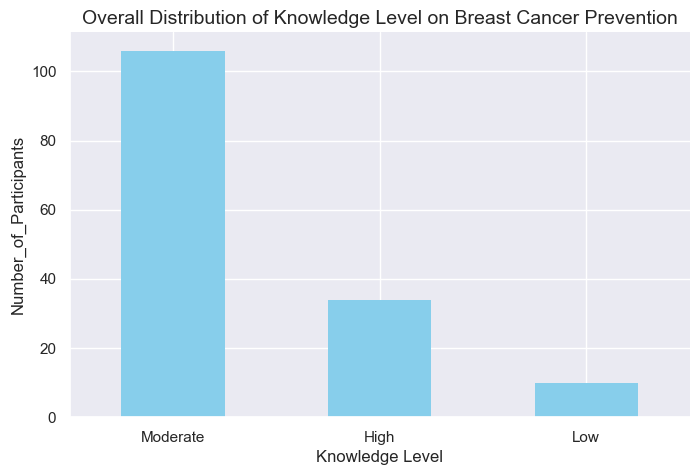

In [79]:
plt.figure(figsize=(8, 5))
overall_knowledge_breastcancer_prevention.plot(kind='bar', color='skyblue', edgecolor='none')
plt.title('Overall Distribution of Knowledge Level on Breast Cancer Prevention', fontsize=14)
plt.xlabel('Knowledge Level', fontsize=12)
plt.ylabel('Number_of_Participants', fontsize=12)
plt.xticks(rotation=0)
sns.despine()
plt.show()

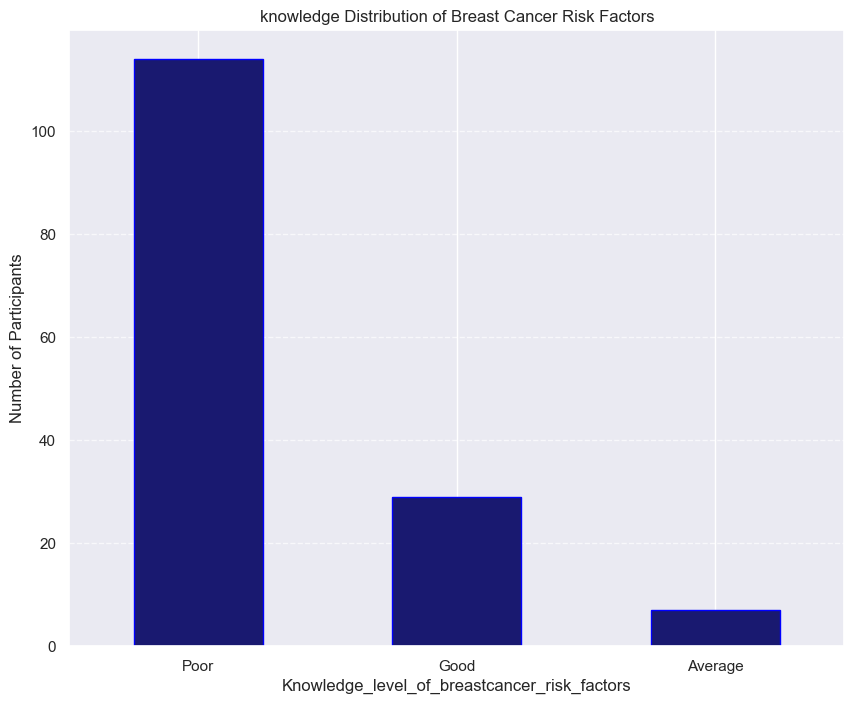

In [83]:
plt.figure(figsize=(10, 8))
breastcancer_riskfactors_counts.plot(kind='bar', color='midnightblue',edgecolor='blue')
plt.title('knowledge Distribution of Breast Cancer Risk Factors')
plt.xlabel('Knowledge_level_of_breastcancer_risk_factors')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.show()

Conclusion The participants demonstrated overall moderate knowledge about breast cancer prevention, although their knowledge of the risk factors associated with breast cancer was relatively poor. Based on the Chi-square test results, with a p-value greater than 0.05, there is no statistically significant association between knowledge about breast cancer prevention and the factors tested (such as age, marital status, family history, etc.). Therefore, i fail to reject the null hypothesis, suggesting that these factors may not be strongly related to knowledge about breast cancer prevention in the population studied.